<a href="https://colab.research.google.com/github/DhritiNirmal/Spotify-Data-Analysis/blob/main/spotipy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install spotipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 138 kB 7.7 MB/s 
     |████████████████████████████████| 246 kB 43.8 MB/s 
     |████████████████████████████████| 62 kB 1.5 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.28.0 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


Start off with signing up at the Spotify official website for zero cost and little effort.


In [ ]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
client_credentials_manager = SpotifyClientCredentials(client_id='dc3ee5c64ce34187af32c1251bb3b1f6', client_secret='79e56e473785425280273f79ad516ea7')
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

We then initialise the spotipy.Spotify object with the Spotify developer’s credentials, stored in the variables CLIENT_ID and CLIENT_SECRET.


In [ ]:
artist_name = []
track_name = []
track_popularity = []
artist_id = []
track_id = []
for i in range(0,1000,25):
    track_results = sp.search(q='year:2022', type='track', limit=25,offset=i)
    for i, t in enumerate(track_results['tracks']['items']):
        artist_name.append(t['artists'][0]['name'])
        artist_id.append(t['artists'][0]['id'])
        track_name.append(t['name'])
        track_id.append(t['id'])
        track_popularity.append(t['popularity'])

Fetch Tracks and Artists

*   The next step is data querying. 
*   We can only fetch information about 50 or less tracks at a time.


*   The q parameter in the sp.search() method is where you can search for specific items.
*   Your search query. You can narrow down your search using field filters. The available filters are album, artist, track, year, upc, tag:hipster, tag:new, isrc, and genre. Each field filter only applies to certain result types.










In [ ]:
import pandas as pd
track_df = pd.DataFrame({'artist_name' : artist_name, 'track_name' : track_name, 'track_id' : track_id, 'track_popularity' : track_popularity, 'artist_id' : artist_id})
print(track_df.shape)
track_df.head()

(1000, 5)


,artist_name,track_name,track_id,track_popularity,artist_id
0,Joji,Glimpse of Us,6xGruZOHLs39ZbVccQTuPZ,97,3MZsBdqDrRTJihTHQrO6Dq
1,Ish Kevin,My Year (2022),16TeLUubmneRAhwmRAMbjM,22,27rjDVGfZG4eorQwrZt2ZD
2,Alonestar,COOKING UP,5D87MkcNRiZ4AsVMwxRrC1,34,1kwi1Q7X4jPTkHTgayxKhS
3,Mabel,Loneliest Time Of Year,66QVjmCkXqtYx3YRgEoj1n,1,1MIVXf74SZHmTIp4V4paH4
4,Harry Styles,As It Was,4LRPiXqCikLlN15c3yImP7,100,6KImCVD70vtIoJWnq6nGn3


Put the queried data into the Pandas Dataframe.

In [ ]:
track_df.sort_values(by = "track_popularity",ascending= False)

,artist_name,track_name,track_id,track_popularity,artist_id
4,Harry Styles,As It Was,4LRPiXqCikLlN15c3yImP7,100,6KImCVD70vtIoJWnq6nGn3
22,Bad Bunny,Ojitos Lindos,3k3NWokhRRkEPhCzPmV8TW,99,4q3ewBCX7sLwd24euuV69X
6,Bad Bunny,Me Porto Bonito,6Sq7ltF9Qa7SNFBsV5Cogx,99,4q3ewBCX7sLwd24euuV69X
10,Bad Bunny,Tití Me Preguntó,1IHWl5LamUGEuP4ozKQSXZ,98,4q3ewBCX7sLwd24euuV69X
0,Joji,Glimpse of Us,6xGruZOHLs39ZbVccQTuPZ,97,3MZsBdqDrRTJihTHQrO6Dq
...,...,...,...,...,...
721,Rea Moon ASMR,"Bright New Year 2022, Pt. B",5HO7yRPydhLkJ1eDyAwtHY,0,5FURLh9ylNZdy7Tc9xkOcl
719,DJ X-Change,New Years Eve Ultimate Countdown 2022 - Epic D...,5eTqvYyW1T1zdh15dei1lp,0,0dsqKMKvFtwNSWPNmLhV5z
717,Rea Moon ASMR,"Bright New Year 2022, Pt. E",4Ivq2AF4Re1IbHV68bCEJU,0,5FURLh9ylNZdy7Tc9xkOcl
715,Swapan Biswas,Happy New Year Song 2022 - Original,4QlehRlxjcp1064QEZArSj,0,4PEBngreT2RhiSnnuS6Y4h


Let’s add information about artists who perform each of the 1000 tracks.

In [ ]:
artist_popularity = []
artist_genres = []
artist_followers = []
for a_id in track_df.artist_id:
  artist = sp.artist(a_id)
  artist_popularity.append(artist['popularity'])
  artist_genres.append(artist['genres'])
  artist_followers.append(artist['followers']['total'])

Now add it to the track_df data frame.

In [ ]:
track_df = track_df.assign(artist_popularity=artist_popularity, artist_genres=artist_genres, artist_followers=artist_followers)
track_df.head()

,artist_name,track_name,track_id,track_popularity,artist_id,artist_popularity,artist_genres,artist_followers
0,Joji,Glimpse of Us,6xGruZOHLs39ZbVccQTuPZ,97,3MZsBdqDrRTJihTHQrO6Dq,85,"[alternative r&b, viral pop]",6237650
1,Ish Kevin,My Year (2022),16TeLUubmneRAhwmRAMbjM,22,27rjDVGfZG4eorQwrZt2ZD,23,[rwandan hip hop],6798
2,Alonestar,COOKING UP,5D87MkcNRiZ4AsVMwxRrC1,34,1kwi1Q7X4jPTkHTgayxKhS,50,[],3871
3,Mabel,Loneliest Time Of Year,66QVjmCkXqtYx3YRgEoj1n,1,1MIVXf74SZHmTIp4V4paH4,70,"[dance pop, edm, pop, pop dance, post-teen pop...",1623921
4,Harry Styles,As It Was,4LRPiXqCikLlN15c3yImP7,100,6KImCVD70vtIoJWnq6nGn3,93,[pop],21650434


Fetch Tracks’ Numerical Features


*   Spotify provides us with thorough insights about 82 million songs.
*   Responses

Audio features for one track

1. acousticness
number
<float>
A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

>= 0
<= 1
2. analysis_url
string
A URL to access the full audio analysis of this track. An access token is required to access this data.

3. danceability
number
<float>
Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

4. duration_ms
integer
The duration of the track in milliseconds.

5. energy
number
<float>
Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

id
string
The Spotify ID for the track.

6. instrumentalness
number
<float>
Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

key
integer
The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.

>= -1
<= 11

7. liveness
number
<float>
Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

8. loudness
number
<float>
The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.

9. mode
integer
Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

10. speechiness
number
<float>
Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

11. tempo
number
<float>
The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

12. time_signature
integer
An estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of "3/4", to "7/4".

>= 3
<= 7
13. track_href
string
A link to the Web API endpoint providing full details of the track.

14. type
string
The object type.

Allowed value:
"audio_features"
uri
string
The Spotify URI for the track.

15. valence
number
<float>
A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

>= 0
<= 1

Fetch the tracks’ features and add them to the data frame.

In [ ]:
track_features = []
for t_id in track_df['track_id']:
  af = sp.audio_features(t_id)
  track_features.append(af)
tf_df = pd.DataFrame(columns = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms', 'time_signature'])
for item in track_features:
  for feat in item:
    tf_df = tf_df.append(feat, ignore_index=True)
tf_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.440,0.317,8,-9.258,1,0.0531,0.8910,0.000005,0.141,0.268,169.914,audio_features,6xGruZOHLs39ZbVccQTuPZ,spotify:track:6xGruZOHLs39ZbVccQTuPZ,https://api.spotify.com/v1/tracks/6xGruZOHLs39...,https://api.spotify.com/v1/audio-analysis/6xGr...,233456,3
1,0.521,0.683,5,-6.240,0,0.5010,0.1590,0.000000,0.187,0.737,139.439,audio_features,16TeLUubmneRAhwmRAMbjM,spotify:track:16TeLUubmneRAhwmRAMbjM,https://api.spotify.com/v1/tracks/16TeLUubmneR...,https://api.spotify.com/v1/audio-analysis/16Te...,161808,3
2,0.544,0.792,2,-8.730,1,0.3430,0.2610,0.000000,0.267,0.628,87.891,audio_features,5D87MkcNRiZ4AsVMwxRrC1,spotify:track:5D87MkcNRiZ4AsVMwxRrC1,https://api.spotify.com/v1/tracks/5D87MkcNRiZ4...,https://api.spotify.com/v1/audio-analysis/5D87...,211766,4
3,0.517,0.609,7,-5.702,1,0.0291,0.0631,0.000000,0.106,0.239,92.093,audio_features,66QVjmCkXqtYx3YRgEoj1n,spotify:track:66QVjmCkXqtYx3YRgEoj1n,https://api.spotify.com/v1/tracks/66QVjmCkXqtY...,https://api.spotify.com/v1/audio-analysis/66QV...,202693,4
4,0.520,0.731,6,-5.338,0,0.0557,0.3420,0.001010,0.311,0.662,173.930,audio_features,4LRPiXqCikLlN15c3yImP7,spotify:track:4LRPiXqCikLlN15c3yImP7,https://api.spotify.com/v1/tracks/4LRPiXqCikLl...,https://api.spotify.com/v1/audio-analysis/4LRP...,167303,4


Drop a few columns and check the structure of our data frames:

In [ ]:
cols_to_drop2 = ['key','mode','type', 'uri','track_href','analysis_url']
tf_df = tf_df.drop(columns=cols_to_drop2)
print(track_df.info())
print(tf_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   artist_name        1000 non-null   object
 1   track_name         1000 non-null   object
 2   track_id           1000 non-null   object
 3   track_popularity   1000 non-null   int64 
 4   artist_id          1000 non-null   object
 5   artist_popularity  1000 non-null   int64 
 6   artist_genres      1000 non-null   object
 7   artist_followers   1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      999 non-null    float64
 1   energy            999 non-null    float64
 2   loudness          999 non-null    float64
 3   speechiness       999 no

Change the column types:

In [ ]:
track_df['artist_name'] = track_df['artist_name'].astype("string")
track_df['track_name'] = track_df['track_name'].astype("string")
track_df['track_id'] = track_df['track_id'].astype("string")
track_df['artist_id'] = track_df['artist_id'].astype("string")
tf_df['duration_ms'] = pd.to_numeric(tf_df['duration_ms'])
tf_df['instrumentalness'] = pd.to_numeric(tf_df['instrumentalness'])
tf_df['time_signature'] = tf_df['time_signature'].astype("category")
print(track_df.info())
print(tf_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   artist_name        1000 non-null   string
 1   track_name         1000 non-null   string
 2   track_id           1000 non-null   string
 3   track_popularity   1000 non-null   int64 
 4   artist_id          1000 non-null   string
 5   artist_popularity  1000 non-null   int64 
 6   artist_genres      1000 non-null   object
 7   artist_followers   1000 non-null   int64 
dtypes: int64(3), object(1), string(4)
memory usage: 62.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   danceability      999 non-null    float64 
 1   energy            999 non-null    float64 
 2   loudness          999 non-null    float64 
 3   speechin

Most popular tracks of 2022:

In [ ]:
track_df.sort_values(by=['track_popularity'], ascending=False)[['track_name', 'artist_name']].head(20)

,track_name,artist_name
4,As It Was,Harry Styles
22,Ojitos Lindos,Bad Bunny
6,Me Porto Bonito,Bad Bunny
10,Tití Me Preguntó,Bad Bunny
0,Glimpse of Us,Joji
20,Moscow Mule,Bad Bunny
34,Efecto,Bad Bunny
40,PROVENZA,KAROL G
26,Party,Bad Bunny
14,About Damn Time,Lizzo


Most followed artist:

In [ ]:
by_art_fol = pd.DataFrame(track_df.sort_values(by=['artist_followers'], ascending=False)[['artist_followers','artist_popularity', 'artist_name','artist_genres']])
by_art_fol.astype(str).drop_duplicates().head(20)

,artist_followers,artist_popularity,artist_name,artist_genres
794,98994367,90,Ed Sheeran,"['pop', 'uk pop']"
184,64549653,95,Drake,"['canadian hip hop', 'canadian pop', 'hip hop'..."
842,62398517,90,Justin Bieber,"['canadian pop', 'pop']"
414,56847644,89,Eminem,"['detroit hip hop', 'hip hop', 'rap']"
15,54772427,92,Taylor Swift,['pop']
100,51423394,92,BTS,"['k-pop', 'k-pop boy group']"
126,50482960,100,Bad Bunny,"['latin', 'reggaeton', 'trap latino']"
418,46227434,91,The Weeknd,"['canadian contemporary r&b', 'canadian pop', ..."
294,40824871,86,Imagine Dragons,"['modern rock', 'rock']"
282,38268591,83,Shawn Mendes,"['canadian pop', 'pop', 'viral pop']"


All the genres in the track_df data frame:

In [ ]:
def to_1D(series):
 return pd.Series([x for _list in series for x in _list])
to_1D(track_df['artist_genres']).value_counts().head(20)

pop                     178
rap                     170
hip hop                 101
workout product          88
trap                     75
dance pop                69
canadian pop             54
chicago rap              47
contemporary country     41
uk pop                   38
chicago drill            36
drill                    36
latin                    34
reggaeton                34
pop rap                  33
edm                      33
melodic rap              33
pop dance                32
trap latino              31
toronto rap              28
dtype: int64

Visualizing the above results:

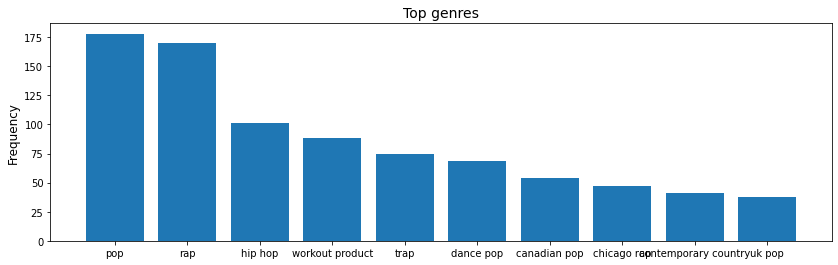

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (14,4))
ax.bar(to_1D(track_df['artist_genres']).value_counts().index[:10],
        to_1D(track_df['artist_genres']).value_counts().values[:10])
ax.set_ylabel("Frequency", size = 12)
ax.set_title("Top genres", size = 14);

Top 20 artists sorted by the number of followers for each of top 10 genres:

In [ ]:
top_10_genres = list(to_1D(track_df['artist_genres']).value_counts().index[:20])
top_artists_by_genre = []
for genre in top_10_genres:
  for index, row in by_art_fol.iterrows():
    if genre in row['artist_genres']:
      top_artists_by_genre.append({'artist_name':row['artist_name'], 'artist_genre':genre})
      break
pd.json_normalize(top_artists_by_genre)

,artist_name,artist_genre
0,Ed Sheeran,pop
1,Drake,rap
2,Drake,hip hop
3,Workout Music,workout product
4,Future,trap
5,Marshmello,dance pop
6,Drake,canadian pop
7,Juice WRLD,chicago rap
8,Luke Combs,contemporary country
9,Ed Sheeran,uk pop


Top 20 tracks sorted by popularity for each of top 10 genres:


In [ ]:
by_track_pop = pd.DataFrame(track_df.sort_values(by=['track_popularity'], ascending=False)[['track_popularity','track_name', 'artist_name','artist_genres', 'track_id']])
by_track_pop.astype(str).drop_duplicates().head(20)
top_songs_by_genre = []
for genre in top_10_genres:
  for index, row in by_track_pop.iterrows():
    if genre in row['artist_genres']:
      top_songs_by_genre.append({'track_name':row['track_name'], 'track_popularity':row['track_popularity'],'artist_name':row['artist_name'], 'artist_genre':genre})
      break
pd.json_normalize(top_songs_by_genre)

,track_name,track_popularity,artist_name,artist_genre
0,As It Was,100,Harry Styles,pop
1,First Class,94,Jack Harlow,rap
2,Jimmy Cooks (feat. 21 Savage),90,Drake,hip hop
3,Beggin’ (Workout Mix),11,Workout Music,workout product
4,WAIT FOR U (feat. Drake & Tems),91,Future,trap
5,About Damn Time,95,Lizzo,dance pop
6,Jimmy Cooks (feat. 21 Savage),90,Drake,canadian pop
7,True Love,88,Kanye West,chicago rap
8,You Proof,84,Morgan Wallen,contemporary country
9,2step (feat. Lil Baby),82,Ed Sheeran,uk pop


 A correlation matrix of the tracks’ features:

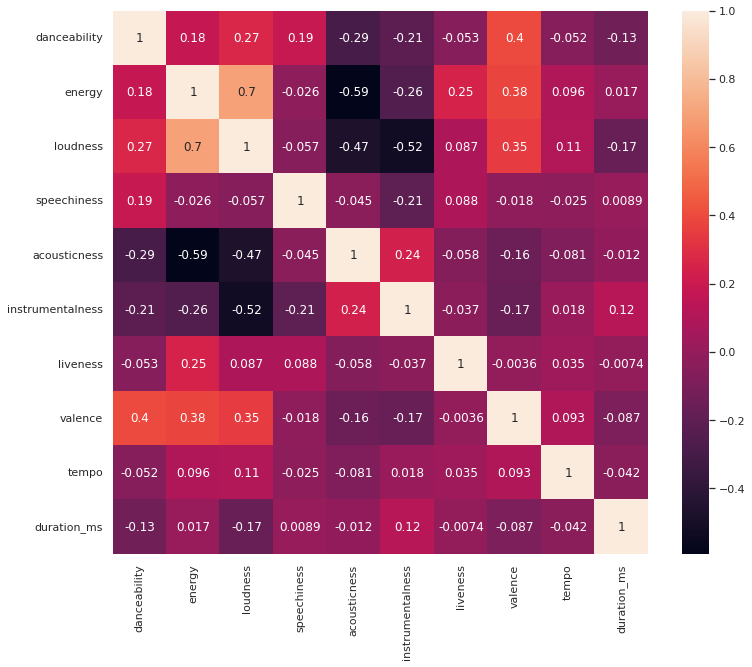

In [ ]:
import seaborn as sn
sn.set(rc = {'figure.figsize':(12,10)})
sn.heatmap(tf_df.corr(), annot=True)
plt.show()

A bivariate KDE for a specific pair of variables:


Plot univariate or bivariate distributions using kernel density estimation.

A kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset, analagous to a histogram. KDE represents the data using a continuous probability density curve in one or more dimensions.

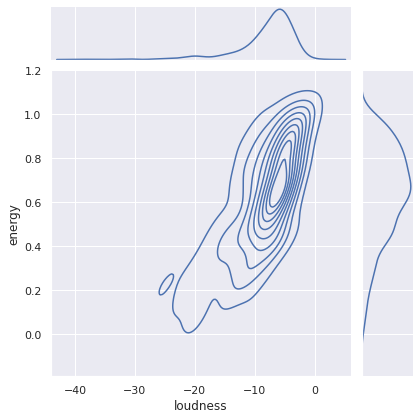

In [ ]:
sn.set(rc = {'figure.figsize':(20,20)})
sn.jointplot(data=tf_df, x="loudness", y="energy", kind="kde");

How are the most popular tracks different from all the tracks in the dataset?

Plotting a feature portrait of the corresponding sets, given mean values of selected features.

In [ ]:
feat_cols = ['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence']
top_100_feat = pd.DataFrame(columns=feat_cols)
for i, track in by_track_pop[:100].iterrows():
  features = tf_df[tf_df['id'] == track['track_id']]
  top_100_feat = top_100_feat.append(features, ignore_index=True)
top_100_feat = top_100_feat[feat_cols]

In [ ]:
from sklearn import preprocessing
mean_vals = pd.DataFrame(columns=feat_cols)
mean_vals = mean_vals.append(top_100_feat.mean(), ignore_index=True)
mean_vals = mean_vals.append(tf_df[feat_cols].mean(), ignore_index=True)
print(mean_vals)

   danceability    energy  speechiness  acousticness  instrumentalness  \
0      0.706310  0.659670     0.100889      0.237483          0.004262   
1      0.645491  0.641431     0.117049      0.230045          0.147812   

   liveness   valence  
0  0.169058  0.533971  
1  0.183066  0.491519  


In [ ]:
import plotly.graph_objects as go
import plotly.offline as pyo
fig = go.Figure(
    data=[
        go.Scatterpolar(r=mean_vals.iloc[0], theta=feat_cols, fill='toself', name='Top 100'),
        go.Scatterpolar(r=mean_vals.iloc[1], theta=feat_cols, fill='toself', name='All'),
    ],
    layout=go.Layout(
        title=go.layout.Title(text='Feature comparison'),
        polar={'radialaxis': {'visible': True}},
        showlegend=True
    )
)

#pyo.plot(fig)
fig.show()

The most popular songs are slightly more danceable and feature more valence. They also have zero instrumentality and little liveness.

Get Recommendations:

The last step in our analysis is to get track recommendations given artist id, genre, and track id. The output is randomised, so Spotify never runs out of content suggestions.

In [ ]:
rec = sp.recommendations(seed_artists=["3PhoLpVuITZKcymswpck5b"], seed_genres=["pop"], seed_tracks=["1r9xUipOqoNwggBpENDsvJ"], limit=100)
for track in rec['tracks']:
  print(track['artists'][0]['name'], track['name'])

Ava Max Kings & Queens
Lionel Richie Say You, Say Me
Jonas Blue Rise
Galantis Runaway (U & I)
Don McLean Vincent
Alan Walker Lily
half•alive creature
Jason Derulo Acapulco
David Guetta Hey Mama (feat. Nicki Minaj, Bebe Rexha & Afrojack)
The Score Victorious
Little Mix Secret Love Song (feat. Jason Derulo)
Neoni LOSER
The Doobie Brothers Long Train Runnin'
Chris Brown New Flame
The Neighbourhood Sweater Weather - Young Saab Remix
Joe Cocker You Are So Beautiful
YUNGBLUD parents
Kiiara Whippin (feat. Felix Snow)
Billy Joel You May Be Right
Imagine Dragons Demons
TOTO Hold the Line
grandson Oh No!!! (from The Suicide Squad)
Nevada The Mack
Neil Diamond Forever In Blue Jeans
Rita Ora Your Song
Maroon 5 Payphone - Cutmore Remix
Daryl Hall & John Oates Maneater
Twenty One Pilots Shy Away
Oh The Larceny Another Level
Electric Light Orchestra Last Train to London
J Balvin Mi Gente
Young Thug Relationship (feat. Future)
AJR Bang!
blackbear queen of broken hearts
TOTO Africa
Twenty One Pilots Ju

https://blog.devgenius.io/spotify-data-analysis-with-python-a727542beaa7https://blog.devgenius.io/spotify-data-analysis-with-python-a727542beaa7

https://seaborn.pydata.org/generated/seaborn.kdeplot.html#:~:text=Plot%20univariate%20or%20bivariate%20distributions,in%20one%20or%20more%20dimensions.

https://developer.spotify.com/documentation/web-api/reference/#/operations/search

https://developer.spotify.com/dashboard/login

https://developer.spotify.com/discover/